In [1]:
# 가동할때마다 인스톨해서 사용해야함
!pip install openai
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.1 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of mdit-py-plugins to determine

# 신경망의 수학적 구성요소

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)= mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
train_images.shape
# train 에 28*28 이 6만개 있음

(60000, 28, 28)

In [5]:
len(train_labels)
# 관측값도 6만개가 있음

60000

In [6]:
train_labels
# 0~9사이 출력

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape
# test에는 1만개 있음

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

#### 신경망 구조

In [10]:
from keras.api._v2.keras import activations
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

컴파일 단계

In [11]:
model.compile(optimizer='rmsprop',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

이미지 데이터 준비

In [12]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
# 0~1사이로 스케일 조정

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

In [14]:
train_images[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

모델 훈련

In [15]:
model.fit(train_images,train_labels, epochs= 10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 10s 8ms/step - loss: 0.2627 - accuracy: 0.9242
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1085 - accuracy: 0.9677
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0708 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0513 - accuracy: 0.9841
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0379 - accuracy: 0.9885
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0284 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0218 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0163 - accuracy: 0.9955
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0125 - accuracy: 0.9967
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0090 - accuracy: 0.997

모델을 사용해 예측해보기

In [16]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 [==============================] - 0s 69ms/step


array([5.6460775e-10, 1.5346070e-10, 1.3276531e-07, 1.9855675e-06,
       6.6110154e-13, 1.4736561e-11, 1.8296968e-15, 9.9999762e-01,
       8.3951429e-10, 1.8396879e-07], dtype=float32)

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'테스트 정확도:{test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0621 - accuracy: 0.9826
테스트 정확도:0.9825999736785889


### 신경망을 위한 데이터 표현

스칼라

In [18]:
import numpy as np
x = np.array(12)
x

array(12)

In [19]:
x.ndim

0

벡터

In [20]:
x = np.array([12,3,6,14,7])
x

array([12,  3,  6, 14,  7])

In [21]:
x.ndim

1

행렬 (랭크-2 텐서)

In [22]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]])
x.ndim

2

행렬 (랭크-3 텐서 와 더 높은 랭크의 텐서)

In [23]:
x = np.array([[[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
             [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
             [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]],
              [[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]]])
x.ndim

3

In [24]:
x.shape # 3행 5열짜리가 4개있음

(4, 3, 5)

핵심 속성

In [25]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

In [26]:
train_images.ndim

3

In [27]:
train_images.shape

(60000, 28, 28)

In [28]:
# unit8 은 8개의 비트로 256개의 서로 다른 값을 표현.
# 이미지 처리에서 많이 사용되는 데이터 형식 중 하나이며, 메모리 효율적이고 연산에 효과적
train_images.dtype

dtype('uint8')

In [29]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

다섯 번째 이미지 출력하기

### 이미지 데이터
- 3차원 이미지의 차원은 "가로 픽셀 수 x 세로 픽셀 수 x 이미지 슬라이스 수"로 표현
- 픽셀은 이미지를 구성하는 가장 작은 단위로, "picture element"의 줄임말이며 이미지를 표현하는 데 사용되는 점 또는 화소
- 흑백 이미지의 경우, 각 픽셀은 단일 색상 값을 가지며, 일반적으로 0부터 255까지의 범위로 표현. 0은 픽셀이 검은색에 가깝고, 255는 픽셀이 흰색에 가깝다.
- 컬러 이미지의 경우, 각 픽셀은 일반적으로 RGB(Red, Green, Blue) 값을 가지며 각각 빨강, 초록, 파랑의 강도를 나타내며, 0부터 255까지의 범위로 표현
- 강도의 조합에 따라 다양한 색상이 생성. 예를 들어, (255, 0, 0)은 빨간색, (0, 255, 0)은 초록색, (0, 0, 255)는 파란색
- 각 픽셀은 이미지의 위치에 따라 좌표로 식별. 가장 왼쪽 위 픽셀이 (0, 0)이며, 가로 방향으로 증가하면서 픽셀의 열 인덱스가 증가하고, 세로 방향으로 증가하면서 픽셀의 행 인덱스가 증가
- 이미지 처리 작업에서는 픽셀 단위의 조작이 중요하며, 픽셀 값을 수정하거나 분석하여 다양한 이미지 효과를 생성하거나 이미지에서 정보를 추출

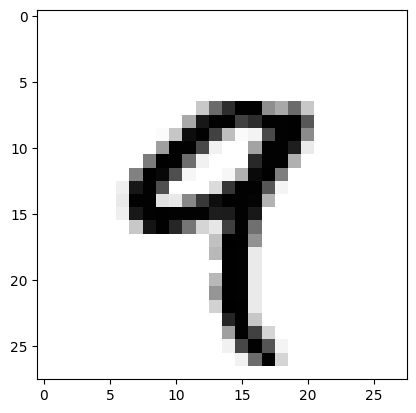

In [30]:
# 특정 시각화 라이브러리나 플랫폼에 따라서 0과 255의 색상 표현이 반대로 표현될 수 있다.
# MNIST 데이터셋의 픽셀 값은 그레이스케일 값으로, 0은 흰색을 의미하고 255는 검은색을 의미
# 특정 시각화 라이브러리나 플랫폼에 따라서 0과 255의 색상 표현이 반대로 설정될 수 있으며
# 일부 라이브러리는 0을 검은색으로, 255를 흰색으로 표현

import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [31]:
train_labels[4]

9

## 넘파이로 서 조작하기

In [32]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [33]:
my_slice = train_images[10:100,:,:]
my_slice.shape

(90, 28, 28)

In [34]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [35]:
my_slice = train_images[:,14:,14:]
my_slice.shape

(60000, 14, 14)

## 배치데이터

In [36]:
batch = train_images[:128]

In [37]:
batch = train_images[128:256]

In [38]:
n=3
batch = train_images[128*n:128*(n+1)] # 배치단위로 작업하게 됨

텐서의 실제 사례

원소별 연산

In [39]:
def naive_relu(x):
  assert len(x.shape)==2
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j]=max(x[i,j],0)
  return x



In [40]:
def naive_add(x,y):
  assert len(x.shape)==2
  assert x.shape==y.shape
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[i,j]
  return x

In [41]:
# 넘파이 내장 함수 원소별 연산 속도

import numpy as np
import time

x = np.random.random((20,100))
y = np.random.random((20,100))

t0 = time.time()
for _ in range(1000):
  z = x+y
  z = np.maximum(z,0.)
print('걸린 시간 : {0:.2f}s'.format(time.time()-t0))

걸린 시간 : 0.01s


In [42]:
t0 = time.time()
for _ in range(1000):
  z = naive_add(x,y)
  z = naive_relu(z)
print('걸린 시간 : {0:.2f}s'.format(time.time()-t0))

걸린 시간 : 2.09s


## 브로드 캐스팅

In [43]:
import numpy as np
X = np.random.random((32,10))
y = np.random.random((10,))

In [44]:
y = np.expand_dims(y, axis = 0)

In [45]:
y

array([[0.91731522, 0.64679057, 0.77620996, 0.26538207, 0.65816887,
        0.09843342, 0.85965233, 0.77471894, 0.48433305, 0.1269887 ]])

In [46]:
Y = np.concatenate([y]*32, axis =0)

In [47]:
Y[:2]

array([[0.91731522, 0.64679057, 0.77620996, 0.26538207, 0.65816887,
        0.09843342, 0.85965233, 0.77471894, 0.48433305, 0.1269887 ],
       [0.91731522, 0.64679057, 0.77620996, 0.26538207, 0.65816887,
        0.09843342, 0.85965233, 0.77471894, 0.48433305, 0.1269887 ]])

In [48]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape)==2
  assert len(y.shape)==1
  assert x.shape[1]==y.shape[0]
  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i,j] += y[j]
  return x

In [49]:
# 덧셈
x = np.arange(10).reshape(2,5)
print(x)
y = np.arange(5) # 5는 맞춰줘야 한다
print(y)
naive_add_matrix_and_vector(x,y)


[[0 1 2 3 4]
 [5 6 7 8 9]]
[0 1 2 3 4]


array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])

In [50]:
import numpy as np
x = np.random.random((64,3,32,10))
y = np.random.random((32,10))
z = np.maximum(x,y)

In [51]:
z.shape

(64, 3, 32, 10)

### 과제 06_28
79~81p 해보기

## 텐서 크기 변환

In [52]:
train_images = train_images.reshape((60000,28*28))

In [53]:
x = np.array([[0.,1.],
              [2.,3.],
              [4.,5.]])
x.shape

(3, 2)

In [54]:
x = x.reshape((6,1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [55]:
x = x.reshape((2,3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [56]:
# 전치행렬

x = np.zeros((300,20))
x = np.transpose(x)
x.shape

(20, 300)


- ReLU(Recitified Linear Unit) 활성화 함수는 인공 신경망에서 널리 사용되는 활성화 함수 중 하나입니다. 이 함수는 입력값이 0보다 작을 경우 0을 출력하고, 입력값이 0보다 큰 경우 입력값을 그대로 출력합니다.

구조적과 비구조적의 차이에 대해 설명하기 전에, 구조적과 비구조적이라는 용어의 정의를 먼저 알아봅시다.

- 구조적(Structured) 데이터는 고정된 형식 또는 구조를 가지고 있는 데이터를 말합니다. 예를 들어, 테이블 형태의 데이터나 배열 형태의 데이터가 구조적 데이터입니다.

- 비구조적(Unstructured) 데이터는 고정된 형식이나 구조를 가지고 있지 않은 데이터를 말합니다. 예를 들어, 텍스트, 이미지, 오디오 등의 데이터가 비구조적 데이터입니다.

ReLU 활성화 함수의 경우 구조적과 비구조적 데이터에 대해 동일하게 적용됩니다. 활성화 함수는 입력값에 대해 동작하며, 입력값이 어떤 형태인지와는 관련이 없습니다. 따라서 구조적 데이터나 비구조적 데이터에 상관없이 ReLU 활성화 함수는 동일한 방식으로 작동합니다.

구조적 데이터의 경우, 주로 입력값으로 사용되는 특성(feature)들이 수치형 데이터인 경우가 많습니다. 예를 들어, 주택 가격을 예측하기 위해 사용되는 데이터의 경우, 방의 개수, 욕실의 개수, 주택의 면적 등이 수치형 데이터로 구성될 수 있습니다. 이러한 수치형 데이터를 입력으로 받은 ReLU 함수는 0보다 작은 값들을 0으로 만들어버리고, 양수 값들은 그대로 출력합니다.

비구조적 데이터의 경우, 예를 들어 이미지 데이터를 입력으로 받는 경우 각 픽셀의 밝기 값을 입력으로 사용할 수 있습니다. ReLU 함수는 이러한 입력값에 대해 작동하며, 음수 값들을 0으로 만들어주고 양수 값들은 그대로 출력합니다.

따라서 ReLU 활성화 함수는 구조적이든 비구조적이든 데이터의 형태와 상관없이 동일한 방식으로 동작하는 함수입니다.

#### TensorFlow를 사용하여 변수 x에 대한 식 y = 2 * x + 3의 그래디언트(기울기)를 계산하고 tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 x의 값을 조정할 때 y가 어떻게 변화하는지를 알 수 있으며, 이는 모델의 최적화와 역전파 알고리즘에서 매우 유용.
- TensorFlow 변수 x를 생성합니다. tf.zeros((2, 2))를 사용하여 크기가 2x2이고 모든 요소가 0인 행렬로 초기화
- tf.GradientTape()를 사용하여 GradientTape 컨텍스트를 생성하고 tape를 사용하여 연산을 기록
- y = 2 * x + 3의 연산을 수행하고 결과를 변수 y에 저장. 이 때, TensorFlow의 브로드캐스팅(broadcasting) 기능을 사용하여 x의 각 요소에 2를 곱하고 3을 더함.
- tape.gradient()를 사용하여 y에 대한 x의 그래디언트를 계산. 이를 통해 y를 x에 대해 미분한 결과, 즉 y에 대한 x의 기울기를 구한다. tape.gradient()의 첫 번째 인자로는 그래디언트를 계산하고자 하는 결과값(y)을 전달하고, 두 번째 인자로는 그래디언트를 계산하고자 하는 변수(x)를 전달.
- grad_of_y_wrt_x에는 y에 대한 x의 그래디언트가 저장된다.

In [57]:
#그래디언트 테이프가 어떻게 작용하는지 살펴보기 -101p
import tensorflow as tf
x = tf.Variable(tf.zeros((2,2)))
with tf.GradientTape() as tape:
  y = 2*x+3
grad_of_y_wrt_x = tape.gradient(y,x) # y에 대한 x의 기울기.

In [58]:
grad_of_y_wrt_x

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [2., 2.]], dtype=float32)>

In [59]:
W = tf.Variable(tf.random.uniform((2,2)))
b = tf.Variable(tf.zeros((2,)))
x = tf.random.uniform(((2,2)))
with tf.GradientTape() as tape:
  y = tf.matmul(x,W) + b
grad_of_y_wrt_W_and_b = tape.gradient(y,[W,b])

In [60]:
grad_of_y_wrt_W_and_b

[<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[0.5978751, 0.5978751],
        [1.1024839, 1.1024839]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 2.], dtype=float32)>]

# 첫번째 예제 다시 살펴보기

#### 옵티마이저 (= 경사하강법)
- 모델의 학습 과정을 통제하고, 모델의 성능을 개선하는 역할
- 손실 함수 (또는 비용 함수)를 최소화하는 파라미터를 찾는 과정이며, 이 과정은 최적화 (Optimization)라고 함
- 옵티마이저
  - 확률적 경사 하강법 (SGD): 가장 기본적인 옵티마이저로, 각 훈련 단계에서 하나의 데이터 포인트 (또는 작은 배치)에 대한 그래디언트(기울기)를 계산하여 모델 파라미터(가중치)를 업데이트
  - 모멘텀: 경사 하강법에 '관성' 개념을 추가하여, 최적화 과정이 수렴을 가속화하고 지역 최솟값에서 벗어나는 데 도움
  - AdaGrad: 학습률이 각 파라미터에 따라 다르게 적용되는 적응형 학습률을 사용합니다. 이는 자주 등장하지 않는 피처에 높은 학습률을 할당하는 데 도움
  - RMSProp: AdaGrad의 문제점인 학습률이 너무 빨리 감소하는 문제를 해결한 방법
  - Adam (Adaptive Moment Estimation): 모멘텀과 RMSProp의 아이디어를 결합한 옵티마이저로, 적응형 학습률과 관성 개념을 모두 사용

#### 손실 함수 (Loss Function)
- 머신러닝 모델의 예측 출력이 실제 값과 얼마나 잘 일치하는지를 측정하는 방법
- 실 함수는 모델의 성능을 수치화하며, 이를 통해 모델의 파라미터를 최적화하는 데 사용
- 유형
  - 평균 제곱 오차 (Mean Squared Error, MSE): 회귀 문제에서 가장 일반적으로 사용되는 손실 함수. 실제 값과 모델의 예측 값 사이의 차이를 제곱한 값의 평균을 계산
  - 크로스 엔트로피 (Cross-Entropy): 분류 문제에서 일반적으로 사용되는 손실 함수. 모델의 예측 확률 분포와 실제 값의 분포 사이의 차이를 측정
  - sparse_categorical_crossentropy는 크로스 엔트로피 손실 함수의 한 형태로,' 다중 클래스 분류 문제'에서 주로 사용
  - 힌지 손실 (Hinge Loss): 서포트 벡터 머신 (SVM)과 같은 알고리즘에서 사용
  - 로그 손실 (Log Loss): 이진 분류 문제에서 사용되며, 예측 확률을 직접적으로 반영

**신경망 구조**

Dense 층
- 모든 입력 뉴런과 출력 뉴런 사이에 연결된 완전히 연결된(fully connected) 층을 의미
- 각 입력 뉴런과 출력 뉴런 사이의 연결 가중치를 학습하고, 입력 신호에 가중치를 곱한 후 편향(bias)을 더하는 선형 변환(linear transformation)을 수행하고 이 선형 변환의 결과에 활성화 함수(activation function)를 적용하여 출력을 계산
- 예를 들어, Dense 층은 입력 벡터 [x₁, x₂, ..., xₙ]과 가중치 행렬 W, 편향 벡터 b가 주어졌을 때, 출력 벡터 [y₁, y₂, ..., yₘ]를 계산

활성화 함수(Activation function)

- 인공 신경망에서 각 뉴런의 출력을 결정하는 비선형 함수
- 활성화 함수는 입력 신호의 가중치 합과 편향을 적용한 후, 그 결과에 적용되어 다음 층으로 전달
- 인공 신경망에서 비선형성을 도입하고, 신경망의 복잡한 함수 근사(approximation) 능력을 향상시키는 것
- 인공 신경망은 여러 층의 연속된 선형 변환과 비선형 활성화 함수를 조합하여 복잡한 입력과 출력 관계를 학습
- 주요 활성화 함수
  - 시그모이드(Sigmoid) 함수:
    - 범위: 0과 1 사이
    - 주요 특징: 입력값을 확률로 해석할 수 있으며, 비선형 함수로서 미분 가능
    - 단점: 큰 입력값에 대해 그래디언트 소실 문제가 발생할 수 있음
  - 하이퍼볼릭 탄젠트(Tanh) 함수:
    - 범위: -1과 1 사이
    - 주요 특징: 시그모이드와 유사하게 비선형 함수이며, 원점을 중심으로 대칭
    - 단점: 여전히 큰 입력값에 대해 그래디언트 소실 문제가 발생할 수 있음
  - 렐루(ReLU, Rectified Linear Unit) 함수:
    - 범위: 0 이상의 입력에 대해 그대로 출력, 음수 입력에 대해 0 출력
    - 주요 특징: 계산이 간단하고 빠르며, 선형 영역으로 쉽게 학습 가능
    - 단점: 음수 입력에 대해 출력이 0이 되어 해당 뉴런이 활성화되지 않는 문제가 있음 (죽은 렐루 문제)
  - 소프트맥스(Softmax) 함수:
    - 범위: 0과 1 사이
    - 주요 특징: 다중 클래스 분류에 사용되며, 출력값을 확률 분포로 해석
    - 단점: 출력값의 합이 1이 되도록 정규화되어, 다른 출력값에 영향을 받을 수 있음

In [73]:
(train_images,train_labels),(test_images,test_labels)= mnist.load_data()
train_images =train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [74]:

model = keras.Sequential([
    layers.Dense(512, activation = 'relu'), # 512는 출력값. 출력 뉴런의 수
    layers.Dense(10, activation = 'softmax') # 다중출력함수. 출력을 확률로 해석하기 위해 소프트맥스 활성화 함수 사용.
])

컴파일 단계

In [75]:
model.compile(optimizer="rmsprop",
              loss = "sparse_categorial_crossentropy",
              metrics = ["accuracy"])


In [76]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: ignored

In [67]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

ValueError: ignored

#### 가중치 vs 그래디언트
가중치는 신경망의 출력을 결정하는 파라미터이며, 그래디언트는 이러한 가중치를 어떻게 조정할지를 결정하는 방향성을 제공하는 지표
- 가중치는 각 입력 특성이 출력에 미치는 영향의 정도를 나타냅니다. 가중치는 학습 과정에서 최적화되며, 초기에는 일반적으로 임의의 값으로 설정되고, 학습 데이터를 통해 그래디언트를 계산하고 가중치를 업데이트함으로써 점진적으로 개선
- 그래디언트(Gradient): 그래디언트는 가중치가 변할 때 손실 함수가 어떻게 변하는지를 나타내는 지표. 그래디언트는 손실 함수의 편미분으로 계산되며, 이는 각 가중치에 대한 손실의 변화율을 나타낸다. 그래디언트는 가중치를 어떻게 업데이트할지를 결정하는데 사용되며, 손실을 줄이는 방향으로 가중치를 조정하는데 도움이 되며 그래디언트가 0인 경우, 해당 가중치는 손실에 미치는 영향이 없거나, 손실을 최소화하는 최적의 값에 도달했음을 의미